# *Specific search (DATE)*

In [27]:
import re #regular expresions
import pytesseract
from pytesseract import Output
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

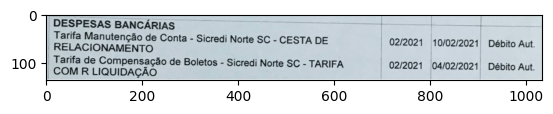

In [28]:
img = cv2.imread('text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

In [29]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata' 

result = pytesseract.image_to_data(rgb, output_type=Output.DICT, config=config_tesseract, lang='por')

result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [30]:
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
min_conf = 40
font = 'text-recognize/Imagens/calibri.ttf'

In [31]:
def drawText(text, x, y, img, font, size=20):
    font = ImageFont.truetype(font, size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - size), text, font=font)
    img = np.array(img_pil)

    return img

In [32]:
def textBox(result, img, color=(255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

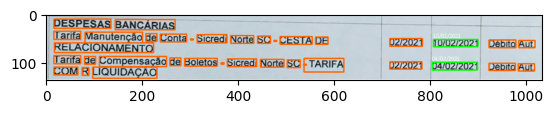

In [36]:
dates = []
copy_img = rgb.copy()

for i in range(len(result['text'])):

    if int(result['conf'][i]) > min_conf:
        text = result['text'][i]

        if re.match(date_pattern, text):
            x, y, img = textBox(result, copy_img, (0, 255, 0))
            copy_img = drawText(text, x, y, copy_img, font, 12)
            dates.append(text)
        else:
            x, y, copy_img = textBox(result, copy_img)


plt.imshow(copy_img)

In [37]:
dates

['10/02/2021', '04/02/2021']